In [1]:
import os, sys, math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm 

sys.path.append('/home/user/BuildSys/ecobee/refactored/')

from exp.nb_methods import DecayCurves

In [2]:
method_params = {
    'generic': {
        'months': (10, 4),
        'hours': (20, 5),
        'timestep': 5,
        'T_in_col': 'intemp',
        'T_out_col': 'outtemp',
        'heat_col': 'heating_rate',
    },
    'decay_curves': {
        'proportion_heating': 0.1,
        'T_in_derivative_threshold': -0.3,
        'T_in_out_diff': 3,
        'minimum_intervals': 4
    },
}    


In [3]:
pth = '/home/user/thermal_property_calibration/synthetic_dataset_creation_new/electric_power_multivar_epwbesos/baseline/control_1/THERMAL ZONE.csv'

In [4]:
dc_model = DecayCurves(
            **method_params['generic'],
            **method_params['decay_curves'])

In [5]:
df =  pd.read_csv(
    pth,
    parse_dates=['Date'], 
    index_col='Date', 
    usecols=['heating_rate', 'outtemp', 'intemp', 'Date']
)
r = dc_model(df, 'THERMAL ZONE')

In [6]:
r[0]

{'start_time': Timestamp('2006-02-12 00:00:00'),
 'end_time': Timestamp('2006-02-12 00:20:00'),
 'T_in_mean': 19.47717297151359,
 'T_out_mean': 5.875,
 'tau': 98.84514720145434,
 'T0': 15.011999505681226,
 'tau_variance': 5.851429247833904,
 'T0_variance': 0.10259220180082564}

In [7]:
vs = df['2006-02-12 00:00:00': '2006-02-12 00:20:00']['outtemp'].values
vs

array([5.69166667, 5.78333333, 5.875     , 5.96666667, 6.05833333])

In [8]:
def f(theta_0, t, tau):
    df['2006-02-11 23:50:00': '2006-02-12 00:35:00']
    return theta_0* math.exp(-t/tau) + vs[t-1]

In [9]:

for i in [1,2,3,4,5]:
    x = f(r[0].get('T0'), i, r[0].get('tau'))
    print(x)

20.552557914581794
20.49463735374595
20.438222512739326
20.383298235239813
20.329849517486277


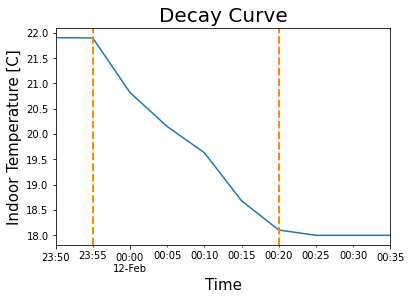

In [10]:
ax = df['2006-02-11 23:50:00': '2006-02-12 00:35:00'][['intemp']].plot()
ax.axvline(pd.to_datetime('2006-02-11 23:55:50'), color='darkorange', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2006-02-12 00:20:00'), color='darkorange', linestyle='--', lw=2)

ax.get_legend().remove()

ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Indoor Temperature [C]', fontsize=15)
ax.set_title('Decay Curve', fontsize=20);

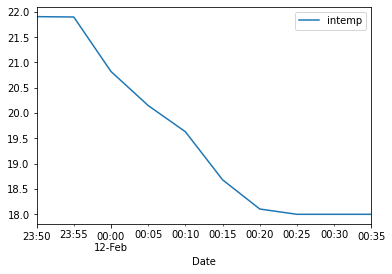

In [11]:
ax = df['2006-02-11 23:50:00': '2006-02-12 00:35:00'][['intemp']].plot()

In [12]:
math.exp(10)

22026.465794806718